`Pair Programming EDA III análisis exploratorio`

Objetivos:
- En el ejercicio de hoy tendremos que contestar a las siguientes preguntas:
- 📌 Nota Como siempre, después de cada gráfica incluid una pequeña explicación de lo que nos está mostrando la gráfica.
- Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.
- Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras - hipótesis:



In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable 

# establecer el tamaño nuestras figuras
plt.rcParams["figure.figsize"] = (10,8)

# en esta lección nos van a salir muchos warning al hacer las gráficas. Para evitar que nos salgan todo el rato podemos ejecutar las siguientes lineas de código
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../Datos/attacks_limpieza_II.csv")


In [2]:
df.head(2)

,case_number,year,type,country,area,location,activity,name,time,species,siglo,species_,injury,mes,fatal_bien,genero_bien,categorias_tiburones,edades
0,2018.06.25,2018,Boating,usa,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,18h00,White shark,siglo - XXI,NaN,"No injury to occupant, outrigger canoe and pad...",Jun,N,F,White,57.0
1,2018.06.03.a,2018,Unprovoked,brazil,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,Late afternoon,Tiger shark,siglo - XXI,NaN,FATAL,Jun,Y,M,Tiger,18.0


¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.

In [3]:
categoricas = df.select_dtypes(include = "object")
categoricas.head(2)

,case_number,type,country,area,location,activity,name,time,species,siglo,species_,injury,mes,fatal_bien,genero_bien,categorias_tiburones
0,2018.06.25,Boating,usa,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,18h00,White shark,siglo - XXI,NaN,"No injury to occupant, outrigger canoe and pad...",Jun,N,F,White
1,2018.06.03.a,Unprovoked,brazil,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,Late afternoon,Tiger shark,siglo - XXI,NaN,FATAL,Jun,Y,M,Tiger


In [4]:
numericas = df.select_dtypes(include = np.number)
numericas.head(2)

,year,edades
0,2018,57.0
1,2018,18.0


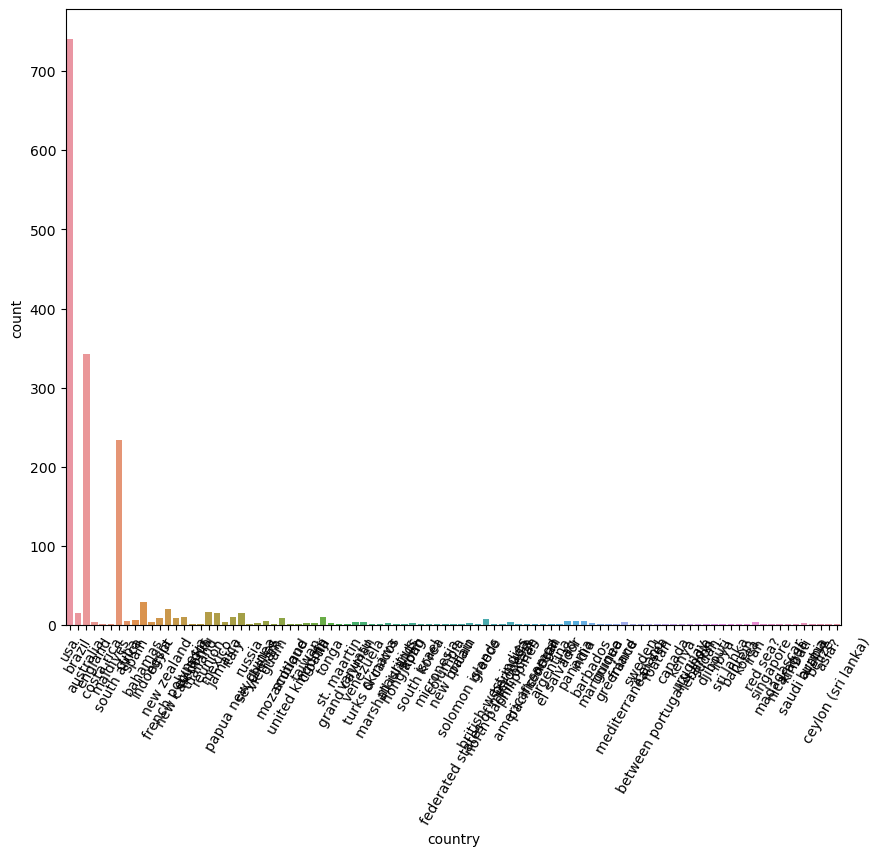

In [5]:
sns.countplot(data=df,x='country') #no se alcanzan a identificar, por lo que ordenaremos para que solo sean visibles 10 países
plt.xticks(rotation=60);

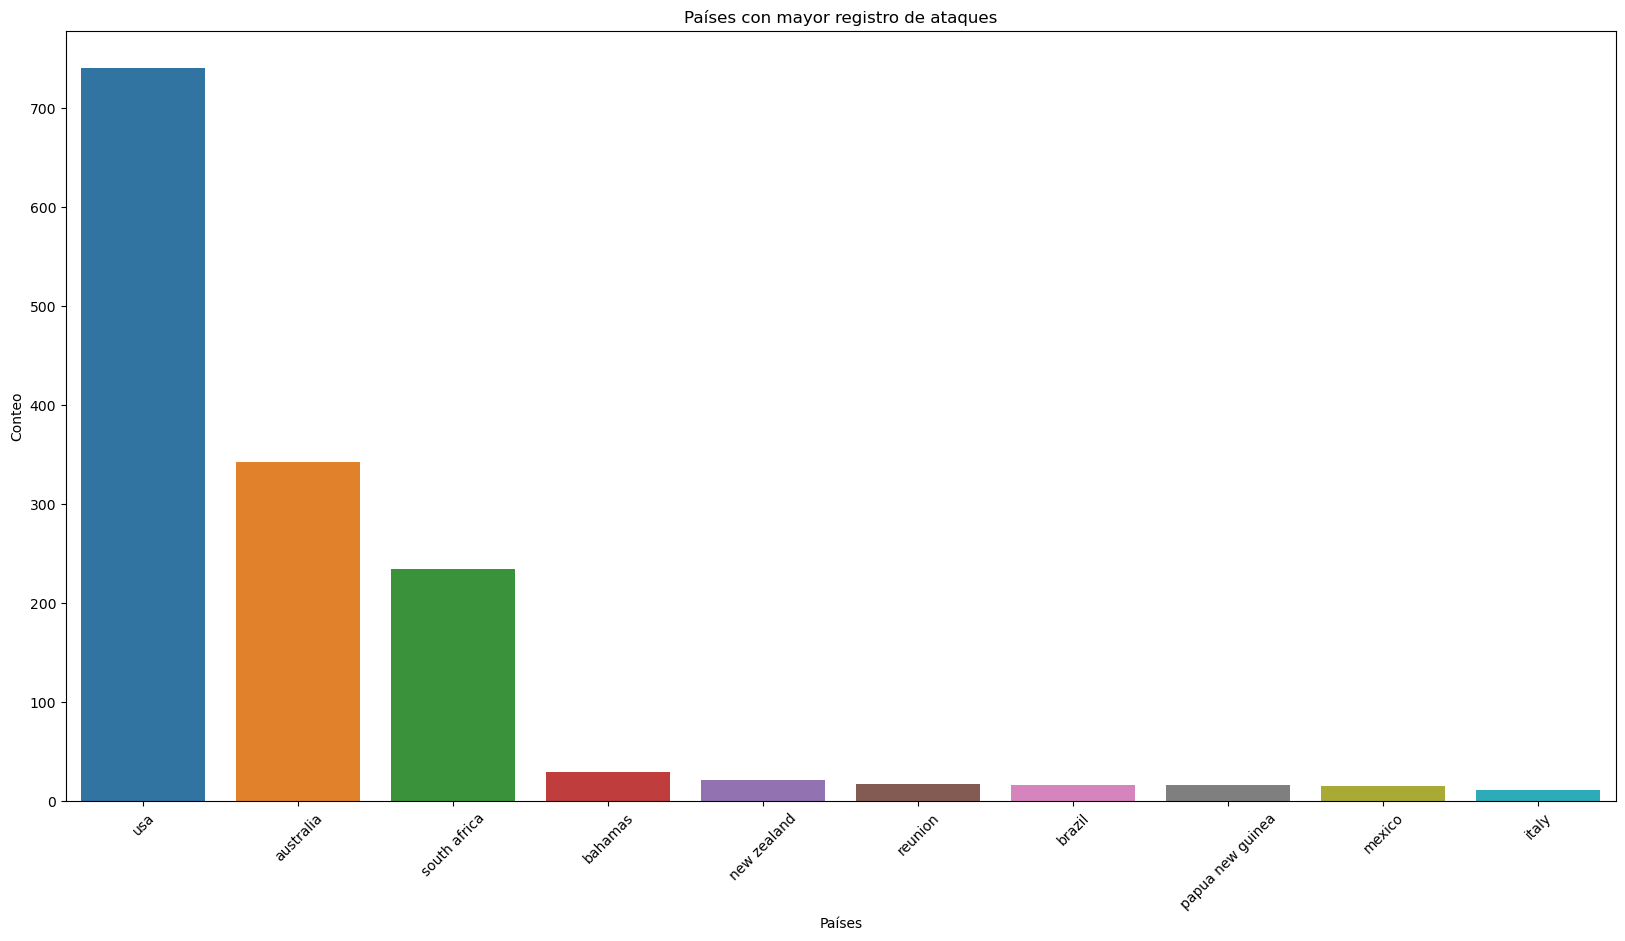

In [14]:
plt.figure(figsize=(20,10))
fig=sns.countplot(data=df,x='country',order=df['country'].value_counts().iloc[:10].index)
plt.title('Países con mayor registro de ataques')
plt.xticks(rotation = 45)
fig.set(ylabel='Conteo', xlabel= 'Países');

Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?

In [7]:
paises_10=df['country'].value_counts().iloc[:10]
paises_10

usa                 741
australia           343
south africa        234
bahamas              29
new zealand          21
reunion              17
brazil               16
papua new guinea     16
mexico               15
italy                11
Name: country, dtype: int64

In [8]:
paises_genero = pd.DataFrame(df.groupby(['country', 'genero_bien'])['case_number'].count())
paises_genero.reset_index(inplace=True)
paises_genero.sort_values(by = 'case_number', ascending=False, inplace=True)

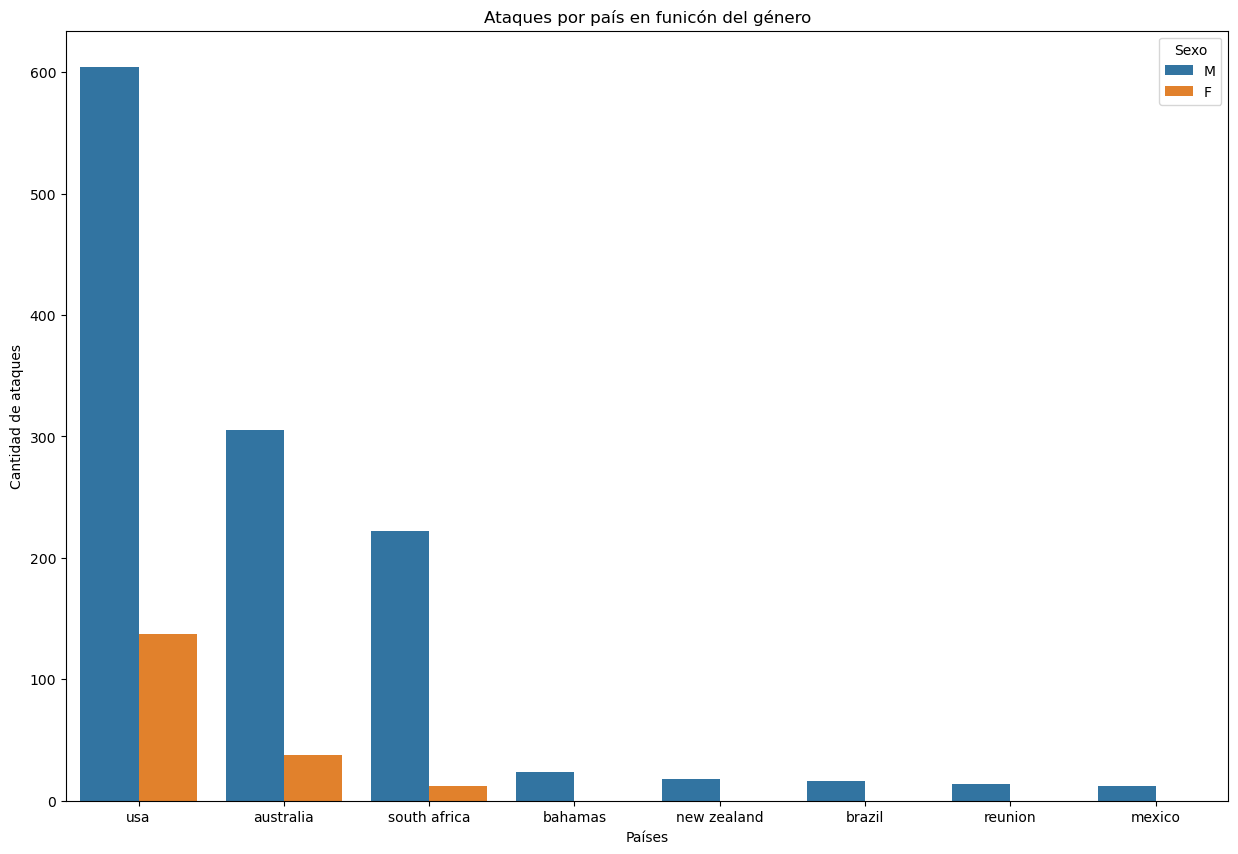

In [9]:
fig,ax=plt.subplots(figsize=(15,10))

sns.barplot(data=paises_genero[:11], x='country', y='case_number', hue='genero_bien')

plt.title('Ataques por país en funicón del género')
ax.set_xlabel('Países')
ax.set_ylabel('Cantidad de ataques')
ax.legend(title='Sexo');

¿Qué edad recibe mayor número de ataques? 💡 Pista 💡 Para que esta gráfica nos salga legible tendremos que crear antes grupos de edad. Para hacer esto de una forma sencilla tenemos el método pd.cut() que aprendimos en la lección de Limpieza II.

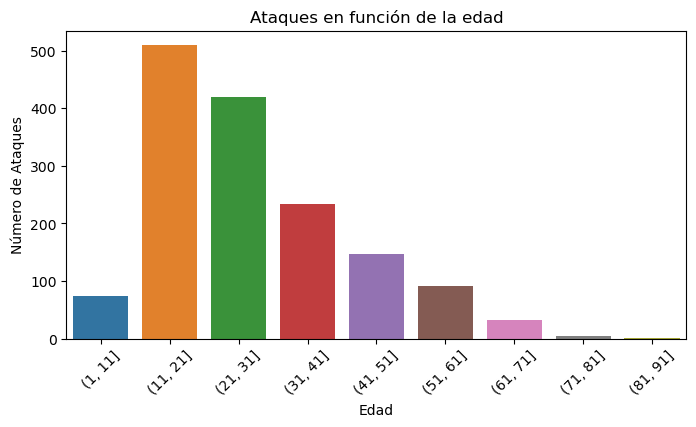

In [10]:
bins = np.arange(1, 100, 10)
df["age_group"] = pd.cut(df["edades"], bins=bins)
plt.figure(figsize =(8,4))
fig = sns.countplot(x= 'age_group', data = df)
fig.set(xlabel='Edad', ylabel= 'Número de Ataques')
fig.set_title('Ataques en función de la edad')
plt.xticks(rotation=45)
plt.show() 

Ataques entre sexos, ¿hay diferencia?

In [11]:
genero = pd.DataFrame(df.groupby('genero_bien')['case_number'].count())
genero.reset_index(inplace=True)
genero.sort_values(by='case_number', ascending=False)

,genero_bien,case_number
1,M,1393
0,F,279


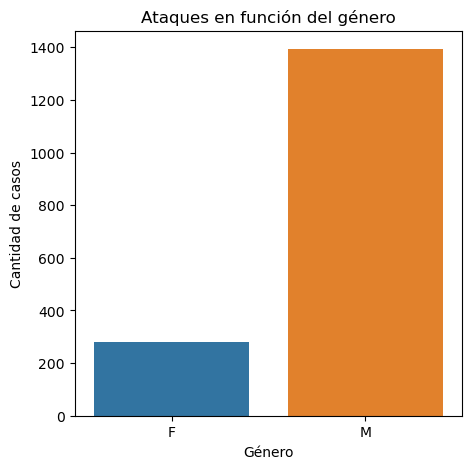

In [16]:
fig,ax=plt.subplots(figsize=(5,5))

sns.barplot(x=genero['genero_bien'], y=genero['case_number'], data=genero)
plt.title('Ataques en función del género')
ax.set_xlabel('Género')
ax.set_ylabel('Cantidad de casos');


¿Cuando ocurren más ataques? ¿Os sale algo raro en la gráfica? Intentad limpiar un poco los datos para que os salga mejor.
Podríamos hacer más gráficas para seguir explorando nuestras hipótesis, pero tenemos el tiempo limitado 😢. Aún así, sentiros libres de explorar todo lo que queráis vuestros datos para entenderlos mejor 😉.

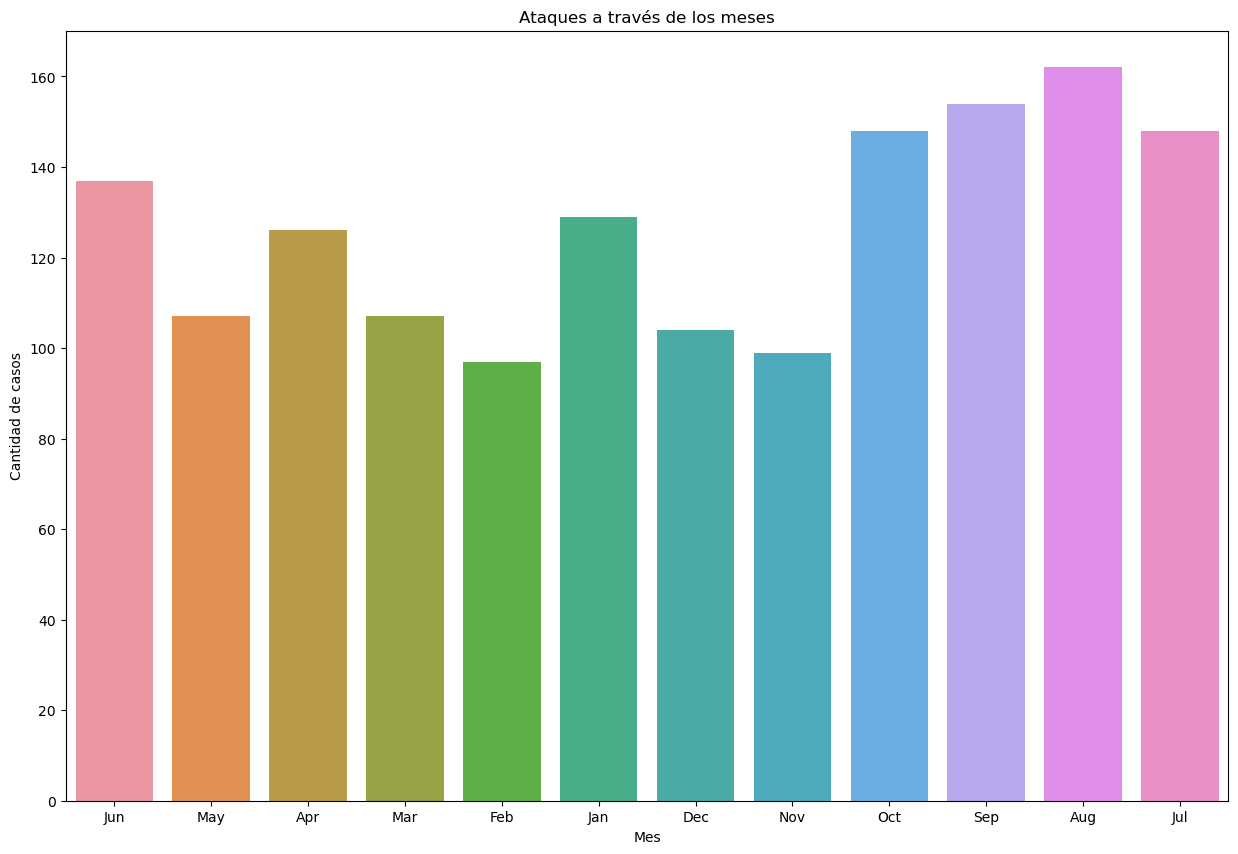

In [19]:
fig,ax=plt.subplots(figsize=(15,10))
sns.countplot(data=df, x='mes')
plt.title('Ataques a través de los meses')
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad de casos');